In [39]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# %matplotlib inline

In [33]:
# sample_size = 10
# sample_size = 5 # small sample size, lead to fat tail on both side, which follow t distribution
sample_size = 3
pop_mean = 0.5
iterations = 10000
t_values = []

for i in range(iterations):
    sample = np.random.uniform(0, 1, sample_size)

    t = (np.mean(sample) - pop_mean) / np.sqrt(np.var(sample, ddof=1)) * np.sqrt(sample_size)
    
    t_values.append(t)

(-7.0, 7.0)

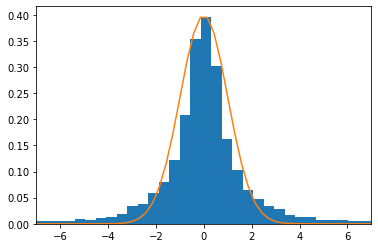

In [35]:
plt.hist(t_values, bins=500, density=True)
x = np.linspace(-7, 7)

plt.plot(x, scipy.stats.norm.pdf(x))
plt.xlim(-7,7)

(-7.0, 7.0)

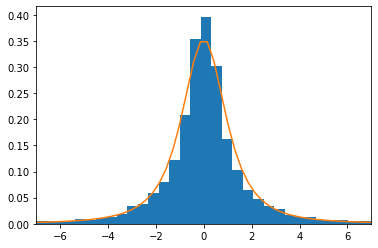

In [37]:
plt.hist(t_values, bins=500, density=True)
x = np.linspace(-7, 7)
"""
df, which is degrees of freedom. 
In fact, normal distribution, the standard normal distribution, is just one distribution. It is universal. 
But for t-distribution, you have to specify the number of degrees of freedom, 
that depends on the sample size. 
The t-distribution that we use depends on our sample size, this is in contrast with normal distribution. 
So, df equals to sample size minus one.
"""
plt.plot(x, scipy.stats.t.pdf(x, df=sample_size-1))
plt.xlim(-7,7)

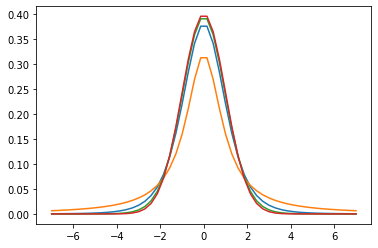

In [40]:
plt.plot(x, scipy.stats.t.pdf(x, df=5), label='t df=5')
plt.plot(x, scipy.stats.t.pdf(x, df=1), label='t df=1')
plt.plot(x, scipy.stats.t.pdf(x, df=20), label='t df=20') # closer to normal
plt.plot(x, scipy.stats.norm.pdf(x), label='norm')

when we have a not so many data, it is safer to use t-distribution and the test that is based on a t-distribution.  
If you have not very large amount of data, we see that t-statistics is distributed according to t-distribution and not a normal distribution.  
So if you create some hypothesis testing algorithm that we'll use, normal distribution, it will probably be too optimistic, it will give you more false-positive results, more type one errors than it is expected according to our roles.


but if you have too small amounts of data, like you'll have only three observations, even t-test can fail because the actual distribution of the t-statistics can differ from the t-distribution.  
It will coincide with the t-distribution only if your data came from the normal distribution. Unfortunately, on practice, it is not possible to test, is it true that our data came from normal distribution if the amount of data is so small?

If we have some reasons to believe that our data came from normal distribution, or at least approximately normal distribution, then we can probably use t-test even for a small amount of data.

But anyway, in this case, if you have like three or five observations, you have to be very careful with your statistical conclusions, but if you have reasonable amount of data, t-test is you friend.

_example_

If sample size increases then at least one element will considerably deviates from the population mean __more often_

---
If sample size increases then at sample average considerably deviates from the population mean __less often__

---
If sample average is less than the H_0 tested average, then corresponding t-statistics will be __negative__

---
Heavy tails of T-distribution (as compared with normal distribution) imply that (choose all correct statements)

- more observations are required to perform statistical testing __False__

_Frankly, it is possible that you need more observation to reject null hypothesis, but you can perform the testing with any reasonable number of observations._

- critical level for t-score in order to reject $H_0$ is larger than it would have been if we used normal distribution. __True__

---
If a sample $(x_1, \ldots, x_n)$ is obtained from the random variable $X$ with $\mathbb EX = 2$ and we perform t-test with null hypothesis $\mathbb EX=2$ what would be the mean value of t-statistics in the corresponding 1-sample t-test?

0

---
Suppose that $H_0$ asserts that mean of the random value that we sample from equals 10 and alternative is $\mathbb EX < 10$. During an experiment the sample mean value turned out to have p-value of 0.1 and the $H_0$ was not rejected. Later on, it was found out that the mean equals 8. How would you describe the result of the experiment?

Type II error was made

_example_

__what makes you happy__

Assume you perform a study to detect how using social networks affects people's hapiness level. You have 20 volunteers. Your study is planned as follows. 

All participants are known to be active users of social networks. First you ask every participant to fill in special questionary that allows you to estimate their hapiness level. After that all participants will avoid using of social networks for one week. 

After this week they complete similar questionary to detect their new level of hapiness. Then for each participants their new hapiness level is compared the initial one. Assume that for each participant their hapiness level is changed: either decreased or increased. 

Let $X$ be the random variable that models the number of participants for who increased their happiness level. Let $X_{obs}=16$, i.e. 16 out of 20 participants become more happy, and it's the only data you can make decision on. Your significance level is 5%.

---
- State null hypothesis and an alternative of your research. Explain why you choose this alternative.

$H_0: p = \frac{1}{2}$ social networks does not affect people's happiness level,

$H_1: p > \frac{1}{2}$ without social networks makes people happy,

- State how X is distributed provided that null hypothesis holds.

Binomial distribution is approximately normal distribution

- Would you claim that people become happier when they avoid using social networks based on this data?

Provide all necessary calculations, p-values, etc.

pop_var  $= n\cdot p \cdot (1-p) = 20 \times \frac{1}{2} \times \frac{1}{2} = 5$

$t = \frac{x-\mu_0}{\sigma} \cdot \sqrt{n} = \frac{16-10}{\sqrt{5}} \cdot \sqrt{20} = 5.366563145999495$

In [70]:
x_obs = 16
t_score = (x_obs-10)/np.sqrt(5)*np.sqrt(20)
t_dis = scipy.stats.t(loc = 10, scale=np.sqrt(5), df=20-1)
p_value = 1- t_dis.cdf(t_score)

print(t_score, p_value)

12.0 0.19114206768371544
